# Phase 1: Subject Creation

**Description:**

This notebook is to act as the resulting summary file for the creation and upload of subjects for the IceCube Zooniverse project currently called *Name that Neutrino!*. The project is currently being maintained by Elizabeth Warrick (as of March 2023). In this notebook, we take the i3 file and run it through several filters. [note: describe more later].

> Nu Type: NuE

> Run: 22076

> SubRun: 000493

### Summary Stats:

To be filled in after completing process. Also need to figure out global variables. 

**Subject Set Name:**

In [1]:
#Imports

#My functions: 
from uniformenergydist_filter import *

#General:
import numpy as np
import sys
import os
import subprocess
import argparse
import csv
from tables import *
import pandas as pd
from matplotlib import pyplot as plt
import h5py

#Zooniverse:
from panoptes_client import Panoptes, Project, SubjectSet, Subject
import magic
import glob

#IceCube:
from icecube.icetray import I3Units
import icecube.MuonGun
from icecube import dataio, dataclasses, icetray, MuonGun
from I3Tray import *
from icecube.hdfwriter import I3HDFWriter
from mc_labeler import MCLabeler #make sure that mc_labeler script is in current directory. 

In [2]:
#Specify file paths:

#Initial I3 File:
nue = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/\
launch/Phase1/classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst'

#Desired output directory. Note that creation of this directory is not yet coded and is done manually. 
phase1_dir = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/'

In [3]:
#Run Filter 1 to label MC truth.
filter1(nue,phase1_dir)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/mc_labeler.py:523: UserWarning: Couldn't find OMKey in MCPESeriesMap
  warnings.warn("Couldn't find OMKey in MCPESeriesMap")


Note that the above cell might return an "exception" warning that the *MCPESeriesMap could not be found*. I am unsure why it does that because when I check the i3 file in dataio-shovel, I see the specified mc_pid_series_map (look at mc_labeler.py for exact name of specified key). The resulting file size should be around 400 MB. 

In [4]:
#Path of hdf from above filter.
nue_hdf = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/\
Phase1/mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst.hd5'

In [7]:
#Run uniformenergy_events function which requires hdf from filter 1, 
#number of bins, size of each random choice, and a random seed. 

uniformenergy_events(nue_hdf,25,10,12,subrun = True)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['binned_log10E'] = pd.cut(x = np.log10(df_filtered['energy']), bins = bins, labels = labels, include_lowest = True) #might throw an error?


Number of Bins: 25
Number of Events per Bin: 10
Total Number of Events: 250
Initial Number of Events: 2545
Number of Events after filtering: 2473
Please input subrun number:
493


The above function throws another warning about pd.cut, currently that is not a problem but I don't know if a new version of pandas will allow this. 

In [2]:
#Path to Random Events CSV
nue_csv = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/random_events_uniform_energy_distrib_22067_493.csv'

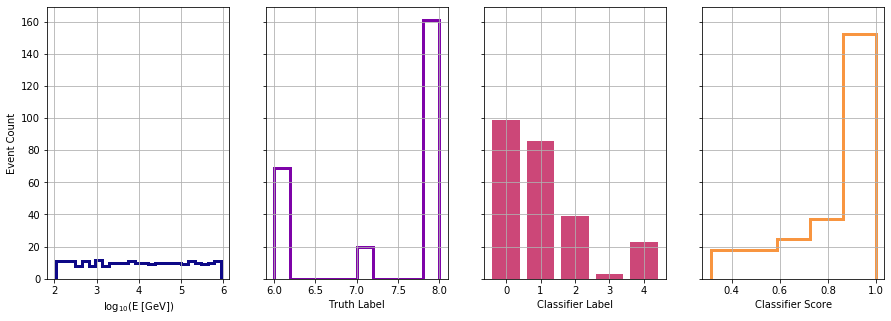

In [9]:
#Run event_characterization_plots function whick makes some quick 
#plots to get an idea of what data you're dealing with.
#Note that I want to update the plot types, maybe make a 2D histogram as Mike K suggested. 
#For truth labels, check out enums.py or in the .py file that holds the functions.

event_characterization_plots(nue_csv)

Now that we have the events for this phase chosen, we run the second filter to pick out only those events. 

In [10]:
#Path to i3 file from filter1 with MC truth labels. 
nue_filter1 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/\
launch/Phase1/mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst'

In [11]:
#Run function to perform second filter which passes through only selected event IDs chosen from 
#the uniformenergy_events function. 
filter2(nue_filter1,phase1_dir,nue_csv)

In [12]:
#Path to i3 file from filter 2 that holds only specified events. 
nue_filter2 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst'

In [13]:
#Run function to perform third filter, which returns only the DAQ frames of the specified events.
#DAQ only file is then split up into many smaller i3 files since SteamShovel can't handle making videos of large
#i3 files at one time. Size limit is approx 2E6 MB (? unsure of units)
filter3(nue_filter2,22067_493,phase1_dir)

In [2]:
#Path to NuMu Daq Only folder
nue_daq = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_22067493/'

In [6]:
get_steamshovel(nue_daq,22067493)

Finished Videos in: daq_only-0005_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst
Finished Videos in: daq_only-0000_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst
Finished Videos in: daq_only-0004_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst
Finished Videos in: daq_only-0003_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst
Finished Videos in: daq_only-0007_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst
Finished Videos in: daq_only-0006_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst
Finished Videos in: daq_only-0002_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst
Finished Videos in: daq_only-0001_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000493.i3.zst


Ideas for Compression:
- Use GUI to add files to queue and send to one compression folder.
- Add a subprocess line in movie script to compress the video after making it and direct it to save in the compression folder. 

In [3]:
compressed_path = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_22067493/'

Can't get manifest yet since some subjects are missing and lining it up won't work. 

In [4]:
get_manifest(compressed_path,nue_csv)

{'/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_22067493/compressed_run_22067_event_668_origidx_22_RF22.mp4': {'event': 668,
  'run': 22067,
  'truth_classification': 6,
  'pred_skim': 0.0008653718396089,
  'pred_cascade': 0.8795592188835144,
  'pred_tgtrack': 0.0144434552639722,
  'pred_starttrack': 0.1045825034379959,
  'pred_stoptrack': 0.0005493785720318,
  'energy': 2312.510937687447,
  'zenith': 1.4319268910075595,
  'oneweight': 57617518931.65158,
  'truth_classification_label': 'contained_em_hadr_cascade',
  'max_score_val': 0.8795592188835144,
  'idx_max_score': 'pred_cascade',
  'binned_log10E': 9},
 '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_22067493/compressed_run_22067_event_8584_origidx_25_RF22.mp4': {'event': 8584,
  'run': 22067,
  'truth_classification': 8,
  'pred_skim': 0.0037641047965735,
  'pred_cascade': 0.0012036900734528,
  'pred_tgtrack': 0.9926624298095704,
  'pred_star

In [5]:
make_subject_set('nue_run_22067_subrun_493_phase1')

Subject Set Name: nue_run_22067_subrun_493_phase1
Subject Set ID: 112116
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112109>]


In [7]:
Panoptes.connect(username='IcecubeObservatory', password='MultiTracks')
proj = Project.find('19023') #links to name that neutrino project
proj.reload()

In [11]:
print(proj.links.subject_sets)
proj.reload()

[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112109>]


In [12]:
uploader(compressed_path,nue_csv,112116)

Confirm if subject set 112116 is listed below.
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112116>, <SubjectSet 112109>]
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112116>, <SubjectSet 112109>]
Number of times loop has ran: 1
Number of times loop has ran: 2
Number of times loop has ran: 3
Number of times loop has ran: 4
Number of times loop has ran: 5
Number of times loop has ran: 6
Number of times loop has ran: 7
Number of times loop has ran: 8
Number of times loop has ran: 9
Number of times loop has ran: 10
Number of times loop has ran: 11
Number of times loop has ran: 12
Number of times loop has ran: 13
Number of times loop has ran: 14
Number of times loop has ran: 15
Number of times loop has ran: 16
Number of times loop has ran: 17
Number of times loop has ran: 18
Number of times loop has ran: 

In [10]:
files = os.listdir(compressed_path) #insert folder path

structured_files = []
for file in files:
    #print(file)
    filename = file.split('_')
    #print(filename)
    run = int(filename[2])
    event = int(filename[4])
    #print(event)
    structured_files.append({'run':run, 'event':event})

In [6]:
made_vids = pd.DataFrame.from_dict(structured_files)

In [10]:
event_df = pd.read_csv(f'{nue_csv}')

In [22]:
# Define function name difference

def difference (list1, list2):
    list_dif = [i for i in list1 + list2 if i not in list1 or i not in list2]
    return list_dif

In [25]:
z = difference(x, y)

print("Difference of first and second String: " + str(z))

Difference of first and second String: [754, 781, 797, 809, 957, 958, 966, 972, 974, 1009, 1049, 1052, 1105, 1159, 1185, 1207, 1212, 1215, 1223, 1696, 1764, 1771, 1850, 1861, 1874, 1916, 1917, 1927, 1933, 1977, 2029, 2031, 2151, 2152, 2194, 2258, 2275, 2297, 2328, 2332, 2691, 2695, 2712, 2756, 2760, 2784, 2957, 3195, 3210, 3218, 3247, 3278, 3318, 3441, 3531, 3561, 3632, 3661, 3695, 3708, 3717, 3736, 3747, 3776, 3833, 3841, 3852, 3924, 3951, 3952, 4038, 4154, 4166, 4187, 4240, 4259, 4271, 4471, 4480, 4496, 4579, 4589, 4604, 4639, 4671, 4720, 4755, 4756, 4780, 5054, 5055, 5073, 5127, 5129, 5169, 5183, 5275, 5277, 5288, 5344, 5391, 5429, 5439, 5484, 5491, 5494, 5624, 5732, 5813, 5831, 5852, 5900, 5929, 5937, 6047, 6057, 6143, 6189, 6240, 6352, 6384, 6414, 6417, 6434, 6434, 8716, 8722, 8751, 8774, 8795, 8846, 8895, 8901, 8931, 8943, 9014, 9074, 9091, 9107, 9137, 9147, 9193, 9211, 9260]


In [33]:
k = event_df.merge(made_vids, left_on='event', right_on='event')

In [38]:
k.drop(columns = ['run_y','Unnamed: 0'])

,run_x,event,truth_classification,pred_skim,pred_cascade,pred_tgtrack,pred_starttrack,pred_stoptrack,energy,zenith,oneweight,truth_classification_label,max_score_val,idx_max_score,binned_log10E
0,22067,4,8,0.000735,8.890571e-05,0.770924,1.783213e-04,0.228074,492.316615,0.737364,4.845810e+08,uncontained_cascade,0.770924,pred_tgtrack,5
1,22067,9,6,0.000167,9.870939e-01,0.000004,1.273133e-02,0.000004,6052.172060,2.036531,1.020837e+12,contained_em_hadr_cascade,0.987094,pred_cascade,12
2,22067,25,8,0.248792,7.948456e-02,0.003259,3.247586e-02,0.635988,162.757530,0.947009,1.771882e+07,uncontained_cascade,0.635988,pred_stoptrack,2
3,22067,85,8,0.998574,8.034160e-10,0.001372,2.080083e-08,0.000053,463599.931300,1.719865,2.117595e+15,uncontained_cascade,0.998574,pred_skim,24
4,22067,152,8,0.999941,2.256999e-09,0.000008,3.391566e-08,0.000051,381258.491780,1.767089,1.507870e+15,uncontained_cascade,0.999941,pred_skim,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,22067,9384,6,0.000428,9.055448e-01,0.000090,9.347267e-02,0.000465,796.715793,1.990420,1.688739e+09,contained_em_hadr_cascade,0.905545,pred_cascade,6
102,22067,9431,8,0.992849,2.801553e-06,0.001970,2.869842e-06,0.005176,18488.700922,1.434895,2.568988e+12,uncontained_cascade,0.992849,pred_skim,15
103,22067,9443,8,0.056947,1.152269e-01,0.177116,4.404747e-02,0.606663,174.676146,1.930596,1.330067e+07,uncontained_cascade,0.606663,pred_stoptrack,2
104,22067,9484,8,0.999730,6.741101e-05,0.000060,6.741654e-05,0.000075,573406.013601,0.922834,2.847104e+15,uncontained_cascade,0.999730,pred_skim,24
